<a href="https://colab.research.google.com/github/OmarShafie/MNIST-HBKU/blob/master/keras_cnn_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Conv2D, Dense, Dropout, MaxPool2D, Flatten
from tensorflow.keras import Model, Sequential
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.metrics import sparse_categorical_accuracy
from tensorflow.keras.optimizers import Adam

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = (x_train / 255.0), (x_test / 255.0) # Normalize to [0, 1]
x_train.__class__

11493376/11490434 [==============================] - 0s 0us/step


numpy.ndarray

In [3]:
x_train.shape # this shape doesn't work for convolutions, which require color channels

(60000, 28, 28)

In [4]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
x_train.shape

(60000, 28, 28, 1)

In [5]:
model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(15, kernel_size=5, activation='relu')) # 10-channel, 5x5 convolution followed by ReLU
model.add(Conv2D(30, kernel_size=5, activation='relu'))
model.add(MaxPool2D(2)) #2x2 maxpool -> 14x14x1
model.add(Conv2D(45, kernel_size=5, activation='relu'))
model.add(Conv2D(90, kernel_size=5, activation='relu'))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# home exercise: define model with Keras functional model API

In [6]:
opt = Adam(learning_rate=0.001)

In [7]:
model.compile(
    optimizer=opt,
    loss=sparse_categorical_crossentropy,
    metrics=[sparse_categorical_accuracy],
)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 15)        390       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 30)        11280     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 45)          33795     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 90)          101340    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 90)          0         
_________________________________________________________________
flatten (Flatten)            (None, 90)                0

In [9]:
bs = 256
n_epoch = 30

history=model.fit(
    x_train,
    y_train,
    batch_size=bs,
    epochs=n_epoch,
    validation_data=(x_test, y_test),
)
scores = model.evaluate(x_test, y_test)
scores[1]

Epoch 1/30
235/235 [==============================] - 2s 9ms/step - loss: 0.3952 - sparse_categorical_accuracy: 0.8770 - val_loss: 0.0773 - val_sparse_categorical_accuracy: 0.9769
Epoch 2/30
235/235 [==============================] - 2s 8ms/step - loss: 0.1145 - sparse_categorical_accuracy: 0.9670 - val_loss: 0.0465 - val_sparse_categorical_accuracy: 0.9851
Epoch 3/30
235/235 [==============================] - 2s 8ms/step - loss: 0.0752 - sparse_categorical_accuracy: 0.9780 - val_loss: 0.0342 - val_sparse_categorical_accuracy: 0.9893
Epoch 4/30
235/235 [==============================] - 2s 8ms/step - loss: 0.0598 - sparse_categorical_accuracy: 0.9828 - val_loss: 0.0319 - val_sparse_categorical_accuracy: 0.9898
Epoch 5/30
235/235 [==============================] - 2s 8ms/step - loss: 0.0509 - sparse_categorical_accuracy: 0.9848 - val_loss: 0.0316 - val_sparse_categorical_accuracy: 0.9899
Epoch 6/30
235/235 [==============================] - 2s 8ms/step - loss: 0.0453 - sparse_categorica

0.9939000010490417

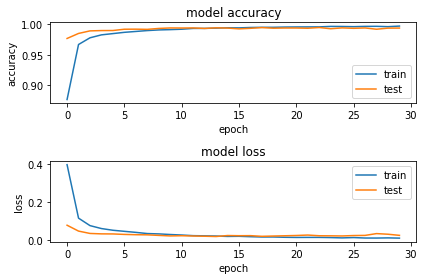

In [10]:
# plotting the metrics
import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt

fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig